# SUPPORT VECTOR REGRESSION

Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)
#This is in two dimensional array

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)
# This is not in two dimensional array, therefore we have to change it in to two dimensional array

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Reachanging y to be in two dimensional array

In [5]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


Applying the feature scale

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [7]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [8]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Training our model with the whole dataset

In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y.ravel())

SVR()

Predicting the results

In [10]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

Visualizing the SVR results

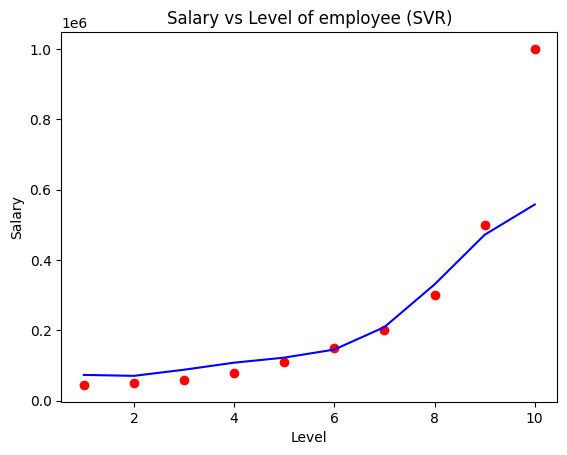

In [11]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color = 'blue')
plt.title('Salary vs Level of employee (SVR)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

Visualizign the SVR result in high resolution

<ipython-input-12-9083c54e7818>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)


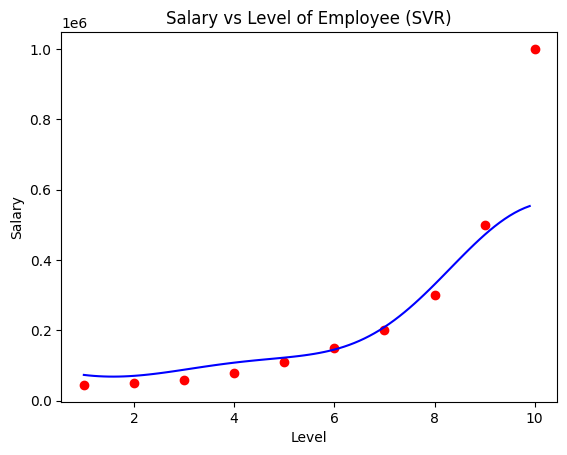

In [12]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape(-1, 1)  # Reshape x_grid to 2D

# Scatter plot of the original data
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')

# Plotting the regression curve
y_grid_pred = regressor.predict(sc_x.transform(x_grid))  # Predict on scaled x_grid
y_grid_original = sc_y.inverse_transform(y_grid_pred.reshape(-1, 1))  # Inverse transform the predictions

plt.plot(x_grid, y_grid_original, color='blue')

# Add titles and labels
plt.title('Salary vs Level of Employee (SVR)')
plt.xlabel('Level')
plt.ylabel('Salary')

plt.show()

# Checking the performance of the model

In [13]:
from sklearn.metrics import r2_score
r2_score(y, regressor.predict(x))

0.7516001070620798

In [25]:
np.set_printoptions(precision= 2)
print(np.concatenate((sc_y.inverse_transform(y),sc_y.inverse_transform(regressor.predict(x).reshape(-1,1))), 1))

[[  45000.     73474.16]
 [  50000.     70786.95]
 [  60000.     88213.01]
 [  80000.    108254.99]
 [ 110000.    122574.52]
 [ 150000.    145503.11]
 [ 200000.    209410.23]
 [ 300000.    330606.89]
 [ 500000.    471671.96]
 [1000000.    557821.76]]
